## Time Series Analysis: GHG Emissions


## Import and Clean Data

Clean the data and focus on a specific subset. For this analysis, we will focus on the total CO2 emissions across all sectors in a specific country. I will choose the "United States" (USA) for this analysis.

Subset the Data
We will subset the data to only include the "United States" and CO2 emissions.

Explanation for Selecting Data Points
I chose the "United States" for this analysis because it is one of the largest contributors to global CO2 emissions, which provides a significant data set for meaningful analysis. By focusing on CO2 emissions, we can analyze the trends and patterns of a critical greenhouse gas over time. This subset will not include forecasted data; only actual historical emissions will be analyzed.

## Steps Taken for Time Series Analysis of CO2 Emissions Data

1. Import Necessary Libraries
Imported pandas, numpy, matplotlib, statsmodels, warnings, and relevant functions from statsmodels.

2. Suppress Warnings and Set Plot Style
Suppressed warnings and set the plotting style to fivethirtyeight.

3. Load the Dataset
Loaded the dataset from an Excel file using pandas read_excel method.

4. Filter Data
Filtered the data to include only CO2 emissions for the United States.
Dropped unnecessary columns such as 'GHG', 'EDGAR Country Code', and 'Country'.

5. Transpose the Data
Transposed the DataFrame so that years become rows and sectors become columns.

6. Set the Index and Convert to PeriodIndex
Renamed the index to 'Year' and converted it to a PeriodIndex with yearly frequency.
Dropped rows with any missing values to ensure clean data.

7. Sum Emissions Across All Sectors
Summed CO2 emissions across all sectors to get total emissions for each year.
Created a new DataFrame with 'Year' and 'Total Emissions'.

8. Convert PeriodIndex to DatetimeIndex
Converted the PeriodIndex to DatetimeIndex for compatibility with Matplotlib and statsmodels functions.

9. Display Part of the Data
Printed the first few rows of the resulting DataFrame to verify the data.

10. Plot the Total CO2 Emissions Data
Plotted the total CO2 emissions data over the years.
Saved the plot as 'total_co2_emissions.png'.

11. Decompose the Time Series Data
Decomposed the time series data into trend, seasonal, and residual components using the seasonal_decompose function from statsmodels.
Saved the decomposition plot as 'decomposition.png'.

12. Conduct a Dickey-Fuller Test
Conducted the Dickey-Fuller test to check for stationarity of the time series data.
Printed the ADF statistic, p-value, and critical values.

13. Apply Differencing if Data is Not Stationary
If the data was found to be non-stationary (p-value > 0.05), applied differencing to make it stationary.
Conducted the Dickey-Fuller test again on the differenced data.
Printed the ADF statistic, p-value, and critical values for the differenced data.

14. Plot Differenced Data
Plotted the differenced total CO2 emissions data.
Saved the plot as 'differenced_co2_emissions.png'.

15. Check for Autocorrelations
Plotted the autocorrelation function (ACF) for the differenced data to check for any significant autocorrelations.
Saved the ACF plot as 'autocorrelation.png'.

## Checking the potential data subset

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Suppressing warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# Load the dataset
file_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/02 Data/Original Data/GHG_Emissions_World_Sector_Country.xlsx'
data = pd.read_excel(file_path, sheet_name='GHG Emissions')

# Filter data for CO2 emissions and the United States
usa_co2 = data[(data['GHG'] == 'CO2') & (data['Country'] == 'United States')]

# Drop unnecessary columns
usa_co2 = usa_co2.drop(columns=['GHG', 'EDGAR Country Code', 'Country'])

# Transpose the DataFrame to have years as rows
usa_co2 = usa_co2.set_index('Sector').T

# Rename the index to 'Year' and ensure it is treated as datetime
usa_co2.index.name = 'Year'
usa_co2.columns.name = None
usa_co2.index = pd.to_datetime(usa_co2.index, format='%Y')

# Drop rows with any missing values
usa_co2 = usa_co2.dropna()

# Sum CO2 emissions across all sectors
usa_co2['Total Emissions'] = usa_co2.sum(axis=1)

# Create a DataFrame with Year and Total Emissions
usa_co2_total = usa_co2[['Total Emissions']]

# Display part of the data
print(usa_co2_total.head())

            Total Emissions
Year                       
1970-01-01      4595.406721
1971-01-01      4460.259211
1972-01-01      4711.116866
1973-01-01      4897.171689
1974-01-01      4727.991524


## Time Series Analysis for CO2 Emissions from United States Between 1970 and 2022

            Total Emissions
Year                       
1970-01-01      4595.406721
1971-01-01      4460.259211
1972-01-01      4711.116866
1973-01-01      4897.171689
1974-01-01      4727.991524


<Figure size 1200x600 with 0 Axes>

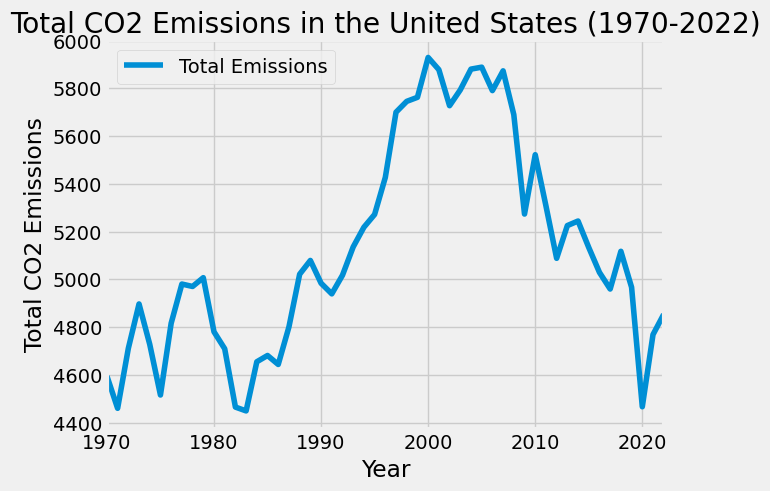

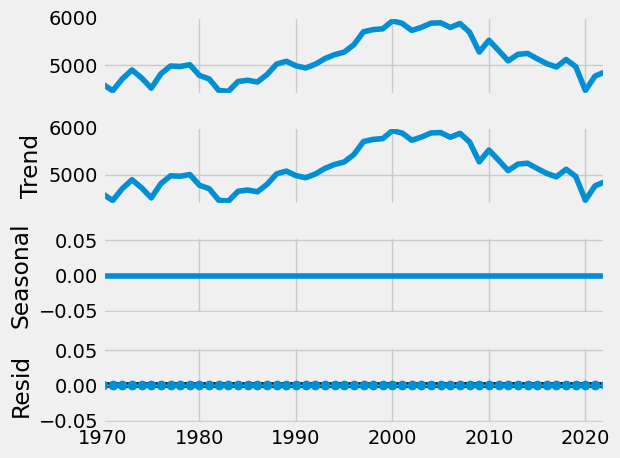

ADF Statistic: -2.723750496803971
p-value: 0.07001779373041911
Critical Values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}
ADF Statistic after differencing: -3.3549661569220937
p-value after differencing: 0.012593286130133462
Critical Values after differencing: {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}


<Figure size 1200x600 with 0 Axes>

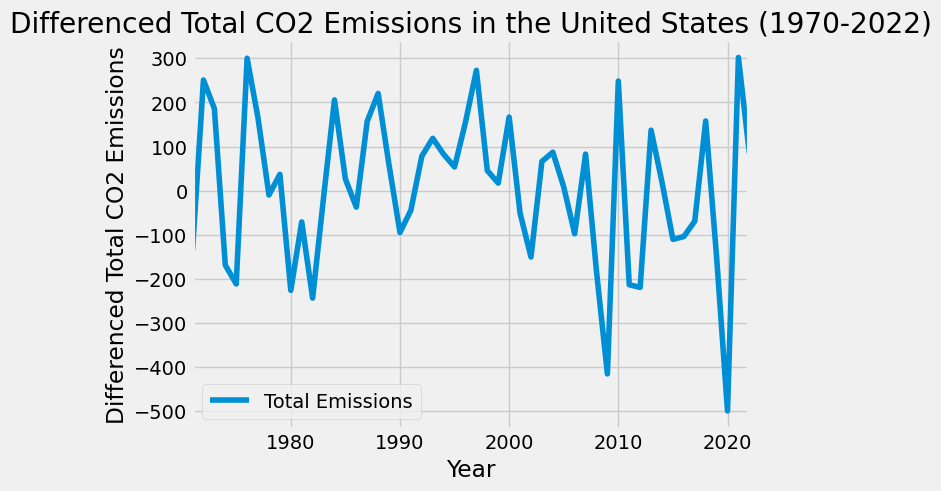

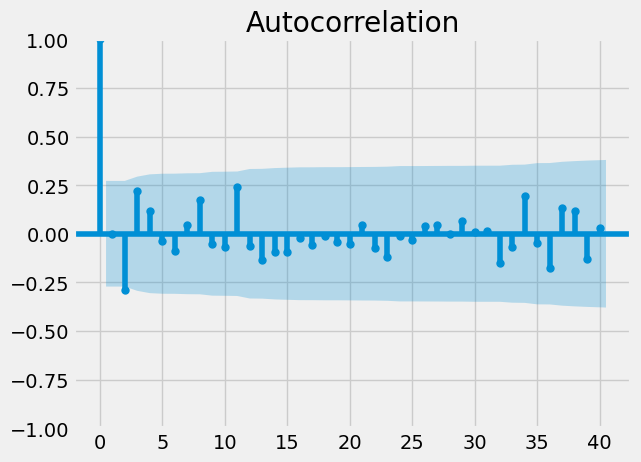

In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Suppressing warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# Load the dataset
file_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/02 Data/Original Data/GHG_Emissions_World_Sector_Country.xlsx'
data = pd.read_excel(file_path, sheet_name='GHG Emissions')


# Filter data for CO2 emissions and the United States
usa_co2 = data[(data['GHG'] == 'CO2') & (data['Country'] == 'United States')]

# Drop unnecessary columns
usa_co2 = usa_co2.drop(columns=['GHG', 'EDGAR Country Code', 'Country'])

# Transpose the DataFrame to have years as rows
usa_co2 = usa_co2.set_index('Sector').T

# Rename the index to 'Year'
usa_co2.index.name = 'Year'
usa_co2.columns.name = None

# Convert the index to datetime and set as yearly frequency
usa_co2.index = pd.to_datetime(usa_co2.index, format='%Y').to_period('Y')

# Drop rows with any missing values
usa_co2 = usa_co2.dropna()

# Sum CO2 emissions across all sectors
usa_co2['Total Emissions'] = usa_co2.sum(axis=1)

# Convert PeriodIndex to DatetimeIndex for plotting and decomposition
usa_co2_total = usa_co2[['Total Emissions']]
usa_co2_total.index = usa_co2_total.index.to_timestamp()

# Display part of the data
print(usa_co2_total.head())

# Plot the total CO2 emissions data
plt.figure(figsize=(12, 6))
usa_co2_total.plot()
plt.title('Total CO2 Emissions in the United States (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.savefig('total_co2_emissions.png')  # Save the plot
plt.show()

# Decompose the time series data
decomposition = sm.tsa.seasonal_decompose(usa_co2_total, model='additive', period=1)
fig = decomposition.plot()
plt.savefig('decomposition.png')  # Save the decomposition plot
plt.show()

# Conduct a Dickey-Fuller test
result = adfuller(usa_co2_total['Total Emissions'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# If the data is not stationary, apply differencing
if result[1] > 0.05:
    usa_co2_diff = usa_co2_total.diff().dropna()
    
    # Conduct the Dickey-Fuller test again on differenced data
    result_diff = adfuller(usa_co2_diff['Total Emissions'])
    print('ADF Statistic after differencing:', result_diff[0])
    print('p-value after differencing:', result_diff[1])
    print('Critical Values after differencing:', result_diff[4])
    
    # Plot the differenced data
    plt.figure(figsize=(12, 6))
    usa_co2_diff.plot()
    plt.title('Differenced Total CO2 Emissions in the United States (1970-2022)')
    plt.xlabel('Year')
    plt.ylabel('Differenced Total CO2 Emissions')
    plt.savefig('differenced_co2_emissions.png')  # Save the differenced plot
    plt.show()
    
    # Check for autocorrelations
    plot_acf(usa_co2_diff['Total Emissions'], lags=40)
    plt.savefig('autocorrelation.png')  # Save the autocorrelation plot
    plt.show()

## Analysis of Results

1. Total CO2 Emissions Plot

The total CO2 emissions plot shows the trend of emissions in the United States from 1970 to 2022. There is a noticeable increase in emissions from the 1970s to the early 2000s, followed by a decline in recent years. Significant peaks and troughs can be observed, indicating periods of higher and lower emissions.

2. Decomposition of Time Series

Trend: The trend component shows the overall direction of the time series. It reveals a general increase in emissions until around 2000, followed by a decline.

Seasonal: The seasonal component is flat at zero, indicating no clear seasonal pattern in the data. This is expected as CO2 emissions data is typically not seasonal.

Residual: The residual component captures the noise in the data. It shows some random fluctuations but no clear pattern, which is expected after removing the trend and seasonal components.

3. Differenced CO2 Emissions Plot

The differenced plot shows the changes in total CO2 emissions from one year to the next. The fluctuations are more pronounced compared to the original data, with several peaks and troughs indicating periods of significant changes in emissions.

4. Autocorrelation Plot

The autocorrelation plot (ACF) shows the correlation of the time series with its own past values.
Most of the autocorrelation values fall within the blue confidence interval, indicating that the differenced data does not have significant autocorrelation. This is a good sign for stationarity.

5. Dickey-Fuller Test Results

Before Differencing:

ADF Statistic: -2.723750496803971
p-value: 0.07001779373041911
Critical Values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}

After Differencing:

ADF Statistic: -3.3549661569220937
p-value: 0.012593286130133462
Critical Values: {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}

6. Interpretation of Dickey-Fuller Test

Before Differencing:

The p-value (0.070) is greater than 0.05, which means we fail to reject the null hypothesis. This indicates that the time series is not stationary.

After Differencing:

The p-value (0.013) is less than 0.05, which means we reject the null hypothesis. This indicates that the differenced time series is stationary.

7. Conclusion

The original CO2 emissions data showed a clear trend but was not stationary.
After applying differencing, the time series became stationary, as confirmed by the Dickey-Fuller test.
The ACF plot of the differenced data indicated no significant autocorrelations, suggesting the data is suitable for further time series modeling and forecasting.